## Name : Eslam Mohamed Mohamed
## ITI Smart Group 2
## Numerical Optmization final Exam


<!-- In this practical exam you are required to do the following:

Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
Update your implementation to work for mini-batch.
Please fulfil the following requirements:

1. Each implementation must be in a sepearate function. i.e. two separate functions.
2. Check each function on the data in the attached file.
3. You must obtain r2-score > 0.9 using each functiion.
4. You must plot the following curves.
    - Loss vs. iterations.
    - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
5. Choose hyper parameters to obtain the required accuracy.
6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.

Best of Luck... -->

## In this practical exam you are required to do the following:

## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
## Update your implementation to work for mini-batch.
## Please fulfil the following requirements:

1. Each implementation must be in a sepearate function. i.e. two separate functions.
2. Check each function on the data in the attached file.
3. You must obtain r2-score > 0.9 using each functiion.
4. You must plot the following curves.
    - Loss vs. iterations.
    - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
5. Choose hyper parameters to obtain the required accuracy.
6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.

Best of Luck...

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [5]:
# Reading the Data
data = np.genfromtxt("MultipleLR.csv - MultipleLR.csv.csv",delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

# Exploring The Data By Visualizing X and Y

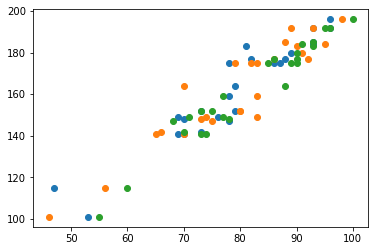

In [12]:
plt.scatter(x=data[:,0] , y =data[:,3] )
plt.scatter(x=data[:,1] , y =data[:,3] )
plt.scatter(x=data[:,2] , y =data[:,3] )

# Adding the X0 column as the first column for Vectorized Implementation
# Bias term

# Then split the Data

In [22]:
X = data[:,:-1]
y = data[:,-1].reshape(-1,1)
print(X.shape)
x0 = np.ones((X.shape[0],1))
print(x0.shape)
X = np.concatenate((x0,X),axis=1)
print(f"X shape is {X.shape}")
print(f"y shape is {y.shape}")

(25, 3)
(25, 1)
X shape is (25, 4)
y shape is (25, 1)


# 1-  Adam (Batch Version) Implmentation

In [25]:
# Cost Function
def compute_cost(H,Y):
    
    # Length of the data M x 1
    m = Y.shape[0]
    
    error_square = np.power((H - Y),2) 
    
    # j = (error.T @ error)/(2*m) # (1 x M) X (M X 1 ) = value
    j = (np.sum(error_square))/(2*m) 
    
    return j

In [59]:
def adam_batch_GD(X,y,alpha,iterations,epsilon,beta1,beta2):
    
    observations_length = X.shape[0]   # M
    
    feature_length = X.shape[1]        # N
    
    # N x 1
    theta = np.ones((feature_length,1))
    
    # cost per epoch
    cost_hist = []
    
    # Temp cost to record history per internal iters
#     temp_cost = []
    
    # temp theta to record theta updates and plot later
    temp_theta = np.zeros((iterations,feature_length)) # assume 100 iteration ,  100 x N
    
    
    # N x 1
    v = np.zeros((feature_length,1))
    # N x 1
    m = np.zeros((feature_length,1))
    
    for i in range(iterations):

        # 1 x N
        temp_theta[i] = theta.T 
        
            
        # (M x N) X (N x 1)
        h = X @ theta # M x 1
                
        j = compute_cost(h,y) # Value
        
        cost_hist.append(j)
        
        error = h - y
        
        # (N x M) X (M x 1) = N x 1
        gradient_vector = (X.T @ error) / len(X)
        
        #adam terms
        m = beta1 * m + (1-beta1) * gradient_vector
        v = beta2 * v + (1-beta2) * np.power(gradient_vector,2)
        
        # Bias correction terms
        m_hat = m / (1-np.power(beta1,i+1))
        v_hat = v /(1-np.power(beta2,i+1))
            
        # Update Theta
        theta = theta - (alpha/(np.sqrt(v_hat)+epsilon)) * m_hat
        
        # Stop condition Definition
        if i > 3:
            if np.abs(cost_hist[i-1] - cost_hist[i]) < 0.001:
                
                print("this is from cost history")
                temp_theta[i] = theta.T
                h = X @ theta
                j = compute_cost(h,y)
                cost_hist.append(j)
                print("No of iterations till converge is ",i)
                break
            
            elif np.linalg.norm(gradient_vector) < 0.001:
                
                print("this is from norm of  gradient vector")
                temp_theta[i] = theta.T
                h = X @ theta
                j = compute_cost(h,y)             
                cost_hist.append(j)               
                print("No of iterations till converge is ",i)       
                break
            
            
    return theta,temp_theta, cost_hist

In [65]:
alpha = 0.003
iterations = 200
epsilon = 10e-8
beta1 = 0.4
beta2 = 0.6

final_theta,theta_history,cost_history = adam_batch_GD(X,y,alpha,iterations,epsilon,beta1,beta2)


this is from cost history
No of iterations till converge is  172


# Initializations of thetas affect the convergence as ones help convergence better

In [79]:
print(final_theta.shape)
print(len(cost_history))
print(theta_history.shape)

(4, 1)
174
(200, 4)


In [77]:
theta_history[:175,1].shape
# cosss = np.array(cost_history)
# cosss.shape

(175,)

Text(0.5, 1.0, 'Cost Vs Iterations')

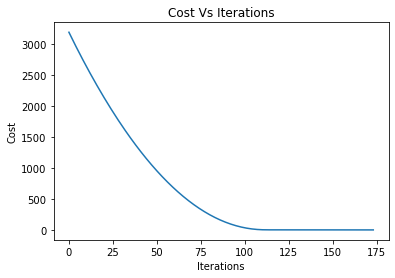

In [61]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Iterations')

Text(0.5, 1.0, 'Cost Vs Theta_0')

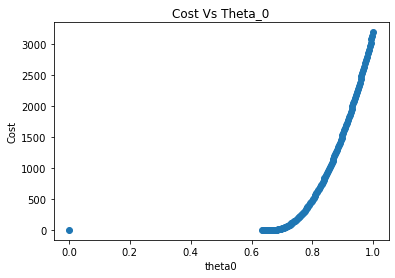

In [85]:
plt.scatter(theta_history[:174,0], cost_history)
plt.xlabel('theta0')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_0')

Text(0.5, 1.0, 'Cost Vs Theta_1')

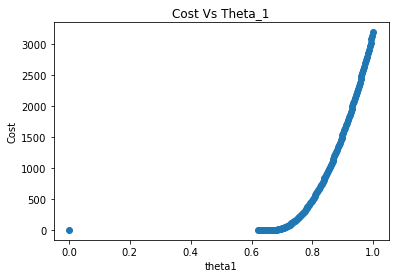

In [86]:
plt.scatter(theta_history[:174,1], cost_history)
plt.xlabel('theta1')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_1')

Text(0.5, 1.0, 'Cost Vs Theta_2')

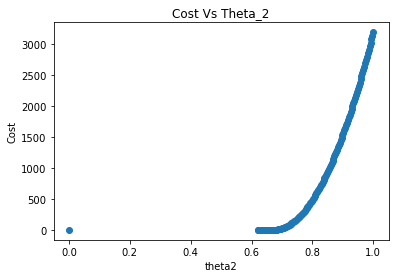

In [87]:
plt.scatter(theta_history[:174,2], cost_history)
plt.xlabel('theta2')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_2')

Text(0.5, 1.0, 'Cost Vs Theta_3')

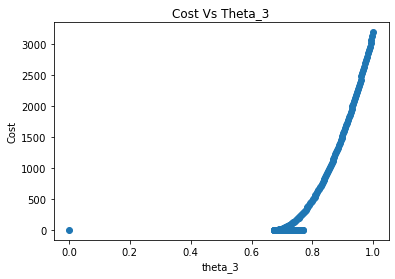

In [91]:
plt.scatter(theta_history[:174,3], cost_history)
plt.xlabel('theta_3')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_3')

# Check R2 Score

In [96]:
y_predicted = X @ final_theta
y_predicted
r2 = r2_score(y,y_predicted)
print(f"R2 Score is {r2}")

R2 Score is 0.9823160111815055


# Done For Batch Implementation Let's Go To Edit It to Become Mini-Batch 

# Adam Mini-Batch Implementation

In [130]:
def adam_mini_batch_GD(X,y,alpha,iterations,epsilon,beta1,beta2,batchSize):
    
    observations_length = X.shape[0]   # M
    
    feature_length = X.shape[1]        # N
    
    # N x 1
    theta = np.ones((feature_length,1)) # Changing initializations to be ones helps alot
    
    # cost per epoch
    cost_hist = []
    
    # Temp cost to record history per internal iterations
    temp_cost = []
    
    # temp theta to record theta updates and plot later
    temp_theta = np.zeros((iterations,feature_length)) # assume 100 iter. ,  100 x N
    
    
    # N x 1
    v = np.zeros((feature_length,1))
    # N x 1
    m = np.zeros((feature_length,1))
    
    for i in range(iterations):

        # 1 x N
        temp_theta[i] = theta.T 

        for b in range(0,observations_length,batchSize):
            
            # (b x N) X (N x 1)
            h = X[b:b+batchSize] @ theta # b x 1
                
            j = compute_cost(h,y[b:b+batchSize]) # Value
        
            temp_cost.append(j)
        
            error = h - y[b:b+batchSize]
        
            # (N x b) X (b x 1) = N x 1
            gradient_vector = (X[b:b+batchSize].T @ error) / len(X[b:b+batchSize])
        
            #adam term
            m = beta1 * m + (1-beta1) * gradient_vector
            v = beta2 * v + (1-beta2) * np.power(gradient_vector,2)
        
            # Bias correction terms
            m_hat = m / (1-np.power(beta1,i+1))
            v_hat = v /(1-np.power(beta2,i+1))
            
            # Update Theta
            theta = theta - (alpha/(np.sqrt(v_hat)+epsilon)) * m_hat
        
        # Stop condition Definition
        h = X[b:b+batchSize] @ theta
        j = compute_cost(h,y[b:b+batchSize]) # Value
        cost_hist.append(j)
        
        if i > 2:
            if np.abs(cost_hist[i-1] - cost_hist[i]) < 0.001:
                
                print("this is from cost history")
                temp_theta[i] = theta.T
                h = X @ theta
                j = compute_cost(h,y)
                cost_hist.append(j)
                print("No of iterations till converge is ",i)
                break
            
            elif np.linalg.norm(gradient_vector) < 0.001:
                
                print("this is from norm of  gradient vector")
                temp_theta[i] = theta.T
                h = X @ theta
                j = compute_cost(h,y)             
                temp_cost.append(j)               
                print("No of iterations till converge is ",i)       
                break
            
            
    return theta,temp_theta, temp_cost, cost_hist

In [131]:
batchSize = 4
final_theta, theta_history, iter_cost, epoch_cost = adam_mini_batch_GD(X,y,alpha,iterations,epsilon,beta1,beta2,batchSize)

this is from cost history
No of iterations till converge is  19


# See the effect of Mini Batches ==> reduced The No. of iterations to become 19 only!

## because more than one update happens per Epoch

Text(0.5, 1.0, 'Cost Vs Iterations')

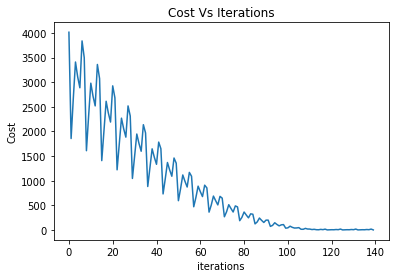

In [132]:
plt.plot(iter_cost)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Iterations')

Text(0.5, 1.0, 'Cost Vs Epoch')

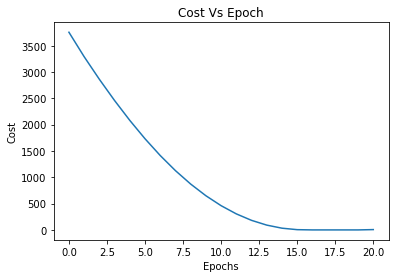

In [133]:
plt.plot(epoch_cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Vs Epoch')

In [117]:
print(len(iter_cost))
print(len(epoch_cost))
theta_history.shape

140
21


(200, 4)

Text(0.5, 1.0, 'Cost Vs Theta_0')

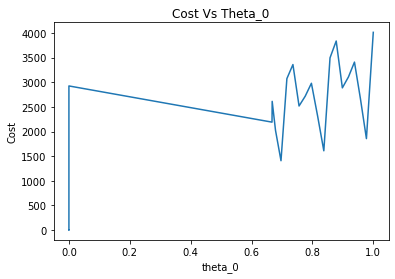

In [119]:
plt.plot(theta_history[:140,0], iter_cost)
plt.xlabel('theta_0')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_0')

Text(0.5, 1.0, 'Cost Vs Theta_1')

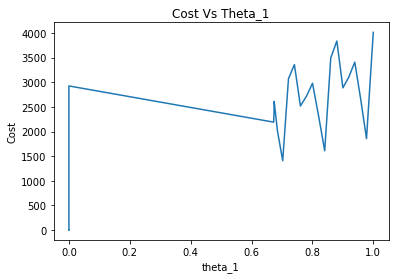

In [120]:
plt.plot(theta_history[:140,1], iter_cost)
plt.xlabel('theta_1')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_1')

Text(0.5, 1.0, 'Cost Vs Theta_2')

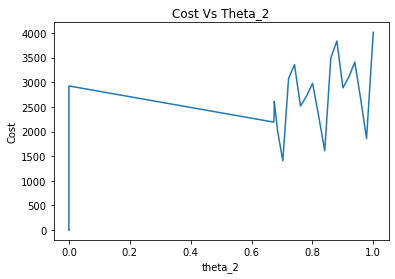

In [121]:
plt.plot(theta_history[:140,2], iter_cost)
plt.xlabel('theta_2')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_2')

Text(0.5, 1.0, 'Cost Vs Theta_3')

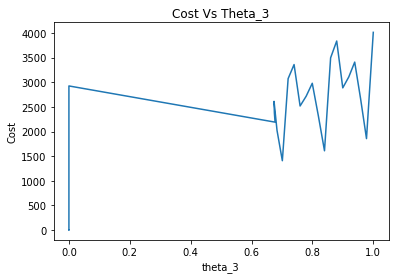

In [122]:
plt.plot(theta_history[:140,3], iter_cost)
plt.xlabel('theta_3')
plt.ylabel('Cost')
plt.title('Cost Vs Theta_3')

In [123]:
y_predicted = X @ final_theta
y_predicted
r2 = r2_score(y,y_predicted)
print(f"R2 Score is {r2}")

R2 Score is 0.9779663025290772


  # Doneeeee 